In [113]:
import re
import nltk
import gensim
from gensim.models import word2vec
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
import string
import numpy as np

from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
%matplotlib inline

In [114]:
content = open('decade files/2020.txt',encoding='UTF-8').readlines()

In [115]:
stopword_set = set(stopwords.words('english'))
stopword_set.update(['country','people','united','nation','peace','world','state','must','assembly','human','countries',
            'development','organization','the','nations','that','of','their','has','which','international','u','new','right','global',
                     'today','president','need','one','also','south','africa','african','soviet'])

punctuation_set = set(string.punctuation)
lemma=WordNetLemmatizer()

In [116]:
def preprocess(doc):
    remove_stopwords  = " ".join(word for word in doc.lower().split() if word not in stopword_set)
    remove_puncutation = "".join(ch for ch in remove_stopwords if ch not in punctuation_set)
    remove_digit = " ".join(word for word in remove_puncutation.split() if not word.isdigit())
    return remove_digit

In [117]:
data=[preprocess(c) for c in content]

In [118]:
#print(data[1:10])

In [119]:
def build_corpus(data):
    corpus=[]
    for sentence in data:
        word_list=sentence.split()
        corpus.append(word_list)
    return corpus

In [120]:
corpus = build_corpus(data)
corpus[0:10]

[[],
 ['name', 'allah', 'gracious', 'merciful', 'mr', 'president'],
 ['assamu', 'alaikum'],
 ['congratulate', 'election', '75th', 'session', 'general', 'assembly'],
 ['passing',
  'unprecedented',
  'crisis',
  'history',
  'humankind',
  'due',
  'covid',
  'pandemic',
  'first',
  'time',
  'uns',
  'history',
  'general',
  'taking',
  'place',
  'digital',
  'platform',
  'without',
  'presence',
  'person',
  'heads',
  'states',
  'heads',
  'governments',
  'un',
  'headquarters',
  'york'],
 ['general',
  'hall',
  'evokes',
  'deep',
  'emotions',
  'me',
  'hall',
  'father',
  'bangabandhu',
  'sheikh',
  'mujibur',
  'rahman',
  'delivered',
  'speech',
  'first',
  'time',
  'bangla',
  'head',
  'government',
  'newly',
  'independent',
  'country',
  'privilege',
  'attending',
  'general',
  'sessions',
  'inperson',
  'times',
  'emphasized',
  'solidarity',
  'speeches',
  'head',
  'government',
  'year',
  'delivering',
  '17th',
  'speech',
  'assembly'],
 ['take',

In [121]:
model = word2vec.Word2Vec(corpus,window=20,min_count=20,workers=4)

In [122]:
model.wv['climate']

array([ 0.12934637,  0.42725766, -0.90527064, -2.4085705 ,  0.67056555,
        1.8921006 , -0.8004913 ,  0.6455499 , -0.8552844 ,  2.0539882 ,
       -0.61524045, -0.12524979, -2.7508407 , -0.13267235, -1.6821226 ,
       -1.3644004 , -0.2528287 ,  0.5397921 ,  2.0788946 , -2.4636467 ,
        0.24195796, -4.054246  ,  1.5896285 ,  1.4125028 , -1.6116835 ,
       -0.19737722, -0.9952728 , -1.5585045 ,  0.07976621,  0.73490894,
        1.3523664 , -0.4431588 , -0.16331972, -2.7100964 ,  2.9570863 ,
       -2.9928615 , -3.1186714 ,  1.1777147 , -1.013601  , -1.2984804 ,
       -0.82857037, -1.4745051 , -2.409384  ,  3.6855106 ,  0.5950227 ,
       -3.580126  ,  0.4205875 , -0.69613785,  1.4442222 , -2.454723  ,
        0.5210396 ,  0.43214014,  3.8484738 ,  0.53838336,  0.04234827,
       -1.0433741 , -2.8622403 , -1.8118919 ,  0.6918011 , -2.5900888 ,
        2.138525  , -2.5876758 ,  1.8460997 , -0.64413154, -2.1420887 ,
        1.1855752 ,  2.8113008 ,  2.0239234 , -0.88242984,  2.66

In [123]:
def tsne_plot(model):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []

    for word in model.wv.index_to_key:
        tokens.append(model.wv[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(16, 16)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

In [124]:
model.wv.most_similar('climate')

[('biodiversity', 0.812225878238678),
 ('warming', 0.7388349771499634),
 ('effects', 0.7111719250679016),
 ('pollution', 0.7109213471412659),
 ('ecosystems', 0.7088175415992737),
 ('limit', 0.7075703740119934),
 ('oceans', 0.7055838108062744),
 ('level', 0.7054893970489502),
 ('emitters', 0.7025467753410339),
 ('ambition', 0.6979645490646362)]

In [125]:
#tsne_plot(model)

In [126]:
def display_closestwords_tsnescatterplot(model, word,name='image.png'):
    model=model.wv
    
    arr = np.empty((0,100), dtype='f')
    word_labels = [word]

    # get close words
    close_words = model.similar_by_word(word)
    
    # add the vector for each of the closest words to the array
    arr = np.append(arr, np.array([model[word]]), axis=0)
    for wrd_score in close_words:
        wrd_vector = model[wrd_score[0]]
        word_labels.append(wrd_score[0])
        arr = np.append(arr, np.array([wrd_vector]), axis=0)
        
    # find tsne coords for 2 dimensions
    tsne = TSNE(n_components=2, random_state=0)
    np.set_printoptions(suppress=True)
    Y = tsne.fit_transform(arr)

    x_coords = Y[:, 0]
    y_coords = Y[:, 1]
    # display scatter plot
    plt.scatter(x_coords, y_coords)

    for label, x, y in zip(word_labels, x_coords, y_coords):
        plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points')
    plt.xlim(x_coords.min()+0.00005, x_coords.max()+0.00005)
    plt.ylim(y_coords.min()+0.00005, y_coords.max()+0.00005)
    plt.savefig('output/'+name+'.png')
    plt.show()

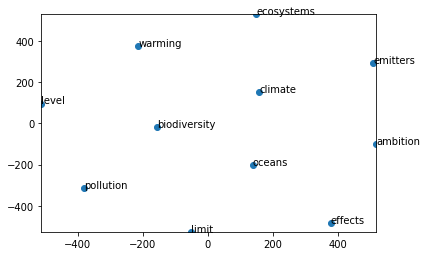

In [127]:
display_closestwords_tsnescatterplot(model, 'climate','2020')